In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [20]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.out(x))

    return x


In [21]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [24]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [25]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [26]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [27]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [30]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [31]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [43]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [44]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 250
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


<ipython-input-20-e2a290eb0007>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


Epoch: 0 and loss: 1.0712651014328003
Epoch: 10 and loss: 0.9926188588142395
Epoch: 20 and loss: 0.8876286149024963
Epoch: 30 and loss: 0.8072300553321838
Epoch: 40 and loss: 0.7254477143287659
Epoch: 50 and loss: 0.6567010879516602
Epoch: 60 and loss: 0.6118403673171997
Epoch: 70 and loss: 0.5903865694999695
Epoch: 80 and loss: 0.580659031867981
Epoch: 90 and loss: 0.5756601691246033
Epoch: 100 and loss: 0.5726934671401978
Epoch: 110 and loss: 0.570682168006897
Epoch: 120 and loss: 0.5691867470741272
Epoch: 130 and loss: 0.5680039525032043
Epoch: 140 and loss: 0.5670288801193237
Epoch: 150 and loss: 0.5662036538124084
Epoch: 160 and loss: 0.565488874912262
Epoch: 170 and loss: 0.56485915184021
Epoch: 180 and loss: 0.564295768737793
Epoch: 190 and loss: 0.5637856721878052
Epoch: 200 and loss: 0.5633187890052795
Epoch: 210 and loss: 0.5628870129585266
Epoch: 220 and loss: 0.5624851584434509
Epoch: 230 and loss: 0.5621166229248047
Epoch: 240 and loss: 0.5618752241134644


Text(0.5, 0, 'Epoch')

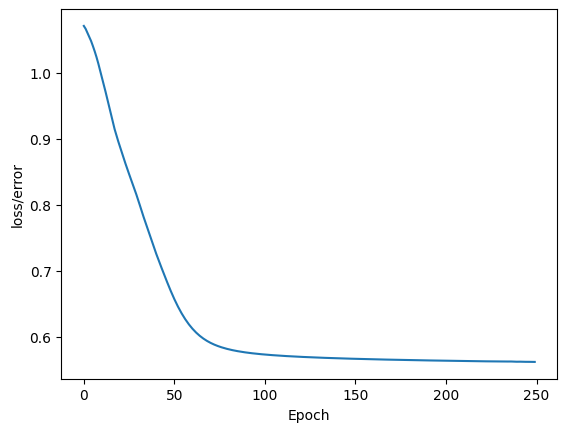

In [45]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [46]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


<ipython-input-20-e2a290eb0007>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


In [47]:
print(len(X_test))

30


In [48]:
loss

tensor(0.6095)

In [49]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([1.6477e-08, 5.7912e-03, 9.9421e-01]) 	 2 	 2
2.)  tensor([9.0974e-14, 1.8505e-07, 1.0000e+00]) 	 2 	 2
3.)  tensor([2.1877e-14, 4.0895e-07, 1.0000e+00]) 	 2 	 2
4.)  tensor([5.7376e-06, 9.9970e-01, 2.9567e-04]) 	 1 	 1
5.)  tensor([1.9457e-11, 6.0667e-05, 9.9994e-01]) 	 2 	 2
6.)  tensor([8.8838e-05, 9.9983e-01, 7.8987e-05]) 	 1 	 1
7.)  tensor([8.4088e-08, 6.1820e-02, 9.3818e-01]) 	 2 	 2
8.)  tensor([5.6626e-06, 9.9975e-01, 2.4581e-04]) 	 1 	 1
9.)  tensor([1.3738e-09, 2.1038e-03, 9.9790e-01]) 	 2 	 2
10.)  tensor([1.0308e-14, 5.5885e-08, 1.0000e+00]) 	 2 	 2
11.)  tensor([2.9747e-07, 1.7131e-01, 8.2869e-01]) 	 2 	 2
12.)  tensor([9.9964e-01, 3.5966e-04, 1.6483e-11]) 	 0 	 0
13.)  tensor([9.9917e-01, 8.2705e-04, 1.9382e-10]) 	 0 	 0
14.)  tensor([2.1432e-03, 9.9774e-01, 1.1645e-04]) 	 1 	 1
15.)  tensor([9.9787e-01, 2.1305e-03, 2.3947e-10]) 	 0 	 0
16.)  tensor([1.2386e-06, 6.7494e-01, 3.2506e-01]) 	 2 	 1
17.)  tensor([9.9927e-01, 7.3390e-04, 9.7106e-11]) 	 0 	 0
18.)  

<ipython-input-20-e2a290eb0007>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


In [50]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [51]:
with torch.no_grad():
  print(model(new_iris))

tensor([9.9945e-01, 5.4610e-04, 5.6732e-11])


<ipython-input-20-e2a290eb0007>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


In [52]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [53]:
with torch.no_grad():
  print(model(newer_iris))

tensor([7.3151e-09, 3.7590e-03, 9.9624e-01])


<ipython-input-20-e2a290eb0007>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


In [54]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [55]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [56]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)